<a href="https://colab.research.google.com/github/ddc-datascience-01/project-3-jolonia/blob/master/Project_3_Data_Cleaning_JO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np


In [7]:
train_df = pd.read_csv('Box_off_train.csv')
train_df.tail()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
2995,2996,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,...,4/22/94,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687
2996,2997,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,...,3/28/13,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590
2997,2998,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,...,10/11/96,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761
2998,2999,NaN,42000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.alongcamepolly.com/,tt0343135,en,Along Came Polly,Reuben Feffer is a guy who's spent his entire ...,15.725542,...,1/16/04,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"For the most cautious man on Earth, life is ab...",Along Came Polly,"[{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...","[{'cast_id': 8, 'character': 'Reuben Feffer', ...","[{'credit_id': '556f817b9251410866000a63', 'de...",171963386
2999,3000,NaN,35000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",http://www.abductionthefilm.com/,tt1600195,en,Abduction,A young man sets out to uncover the truth abou...,10.512109,...,9/22/11,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They stole his life. He's taking it back.,Abduction,"[{'id': 591, 'name': 'cia'}, {'id': 822, 'name...","[{'cast_id': 2, 'character': 'Nathan Harper', ...","[{'credit_id': '5391990d0e0a260fb5001629', 'de...",82087155


In [8]:
train_df.crew[0]

'[{\'credit_id\': \'59ac067c92514107af02c8c8\', \'department\': \'Directing\', \'gender\': 0, \'id\': 1449071, \'job\': \'First Assistant Director\', \'name\': \'Kelly Cantley\', \'profile_path\': None}, {\'credit_id\': \'52fe4ee7c3a36847f82afad7\', \'department\': \'Directing\', \'gender\': 2, \'id\': 3227, \'job\': \'Director\', \'name\': \'Steve Pink\', \'profile_path\': \'/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg\'}, {\'credit_id\': \'5524ed25c3a3687ded000d88\', \'department\': \'Writing\', \'gender\': 2, \'id\': 347335, \'job\': \'Writer\', \'name\': \'Josh Heald\', \'profile_path\': \'/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg\'}, {\'credit_id\': \'5524ed2d925141720c001128\', \'department\': \'Writing\', \'gender\': 2, \'id\': 347335, \'job\': \'Characters\', \'name\': \'Josh Heald\', \'profile_path\': \'/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg\'}, {\'credit_id\': \'5524ed3d92514166c1004a5d\', \'department\': \'Production\', \'gender\': 2, \'id\': 57822, \'job\': \'Producer\', \'name\': \'Andrew Panay\', \

In [9]:
def genres_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace('\'','').replace(' ','').replace("name", "").replace("id", "").replace(":", "")
    ll = str1.split(",")[1::2]
    return ll

In [10]:
genres_preprocessing(train_df.genres[0])

['Comedy']

In [11]:
train_df["genres_processed"] = train_df.genres.apply(lambda elem: genres_preprocessing(elem))

In [12]:
train_df['genres_processed']

0                                 [Comedy]
1         [Comedy, Drama, Family, Romance]
2                                  [Drama]
3                        [Thriller, Drama]
4                       [Action, Thriller]
                       ...                
2995                     [Comedy, Romance]
2996                        [Drama, Music]
2997    [Crime, Action, Mystery, Thriller]
2998                     [Comedy, Romance]
2999           [Thriller, Action, Mystery]
Name: genres_processed, Length: 3000, dtype: object

In [13]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'genres_processed'],
      dtype='object')

In [14]:
train_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genres_processed
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,[Comedy]
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,"[Comedy, Drama, Family, Romance]"
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,[Drama]
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,"[Thriller, Drama]"
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,"[Action, Thriller]"


In [15]:
import ast
res = ast.literal_eval(train_df.crew[0].replace('[','').replace(']',''))


In [16]:
train_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genres_processed
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,[Comedy]
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,"[Comedy, Drama, Family, Romance]"
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,[Drama]
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,"[Thriller, Drama]"
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,"[Action, Thriller]"


In [17]:
train_df.drop('status', axis=1, inplace=True)

In [18]:
train_df.drop('homepage', axis=1, inplace=True)

In [19]:
train_df.drop('id', axis=1, inplace=True)

In [20]:
train_df.drop('imdb_id', axis=1, inplace=True)

In [21]:
train_df.drop('poster_path', axis=1, inplace=True)

In [22]:
train_df.drop('tagline', axis=1, inplace=True)

In [23]:
train_df.drop('original_title', axis=1, inplace=True)

In [24]:
train_df.drop('genres', axis=1, inplace=True)

In [25]:
train_df.drop('overview', axis=1, inplace=True)

In [26]:
train_df.drop('Keywords', axis=1, inplace=True)

In [27]:
train_df.head()

,belongs_to_collection,budget,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,title,cast,crew,revenue,genres_processed
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,[Comedy]
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,"[Comedy, Drama, Family, Romance]"
2,NaN,3300000,en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,[Drama]
3,NaN,1200000,hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,"[Thriller, Drama]"
4,NaN,0,ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,"[Action, Thriller]"


In [28]:
res = ast.literal_eval(train_df.belongs_to_collection	[0].replace('[','').replace(']',''))


In [29]:
train_df.head()

,belongs_to_collection,budget,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,title,cast,crew,revenue,genres_processed
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,[Comedy]
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,"[Comedy, Drama, Family, Romance]"
2,NaN,3300000,en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,[Drama]
3,NaN,1200000,hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,"[Thriller, Drama]"
4,NaN,0,ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,"[Action, Thriller]"


In [30]:
import ast

res = ast.literal_eval(train_df.crew[0].replace('[','').replace(']',''))

(res[1])

{'credit_id': '52fe4ee7c3a36847f82afad7',
 'department': 'Directing',
 'gender': 2,
 'id': 3227,
 'job': 'Director',
 'name': 'Steve Pink',
 'profile_path': '/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg'}

In [31]:
jobName = 'job'
jobTitle = 'Director'
fieldName = 'name'

string  = str(train_df.crew[7]).replace('[','').replace(']','')
res     = ast.literal_eval(string)
outputs = []
if isinstance(res,dict):
  if res[jobName]==jobTitle:
    outputs.append(res[fieldName])
else:
  for idx in (np.arange(0,(len(res)-1))):
    if res[idx][jobName]==jobTitle:
      outputs.append(res[idx][fieldName])

outputs

['Jehane Noujaim']

In [32]:
def field_extract_crew(elem, jobName, jobTitle, fieldName):
  nullColumn = pd.isnull(elem)
  if nullColumn:
    outputs = ' '
  else:
    string  = str(elem).replace('[','').replace(']','')
    res     = ast.literal_eval(string)
    outputs = []
    if isinstance(res,dict):
      if res[jobName]==jobTitle:
        outputs.append(res[fieldName])
    else:
      for idx in (np.arange(0,(len(res)-1))):
        if res[idx][jobName]==jobTitle:
          outputs.append(res[idx][fieldName])
  
  return outputs

In [33]:
train_df['director_processed'] = train_df.crew.apply(lambda elem: field_extract_crew(elem,'job','Director','name'))

In [34]:
train_df['producer_processed'] = train_df.crew.apply(lambda elem: field_extract_crew(elem,'job','Producer','name'))

In [35]:
train_df.producer_processed

0                                          [Andrew Panay]
1       [Whitney Houston, Mario Iscovich, Debra Martin...
2       [David Lancaster, Michel Litvak, Jason Blum, H...
3                                           [Sujoy Ghosh]
4                                                      []
                              ...                        
2995                                  [James G. Robinson]
2996                                      [Lars J√∂nsson]
2997    [Stephanie Austin, Shane Black, Renny Harlin, ...
2998        [Danny DeVito, Michael Shamberg, Stacey Sher]
2999    [Doug Davison, Roy Lee, Ellen Goldsmith-Vein, ...
Name: producer_processed, Length: 3000, dtype: object

In [36]:
def field_extract_genres(elem, fieldName):
  string  = str(elem).replace('[','').replace(']','')
  res     = ast.literal_eval(string)
  outputs = []
  for idx in (np.arange(0,(len(res)-1))):  
    outputs.append(res[idx][fieldName])
  
  return outputs

In [37]:
def genres_preprocessing(elem):
    if pd.isnull(elem):
      one = ' '
    else:
      str1 = elem.replace(']','').replace('[','').replace('{','').replace('}','').replace('\'','').replace(' ','').replace('name','').replace('id','').replace(':','')
      one = str1.split(',')[1::2]
    return one

In [38]:
elem = train_df.cast[0]
jobName = 'job'
jobTitle = 'Director'
fieldName = 'name'

string  = str(elem).replace('[','').replace(']','')
res     = ast.literal_eval(string)

outputs = []
for idx in (np.arange(0,(len(res)-1))):  
   if res[idx][jobName]==jobTitle:
     outputs.append(res[idx][fieldName])

outputs

KeyError: 'job'

In [ ]:
train_df.head()

In [ ]:
train_df.head()

In [ ]:
def (elem):
    if pd.isnull(elem):
      one = ' '
    else:
      str1 = elem.replace(']','').replace('[','').replace('{','').replace('}','').replace('\'','').replace(' ','').replace('name','').replace('id','').replace(':','')
      one = str1.split(',')[1::2]
    return one

In [ ]:

res2 = ast.literal_eval(train_df.cast[0].replace('[','').replace(']',''))
(res2[1])

In [ ]:
jobName = 'name'


string  = str(train_df.cast[7]).replace('[','').replace(']','')
res     = ast.literal_eval(string)
outputs = []
if isinstance(res2,dict):
  if res2[jobName]== :
    outputs.append(res2[fieldName])
else:
  for idx in (np.arange(0,(len(res)-1))):
    if res[idx][jobName]==jobTitle:
      outputs.append(res[idx][fieldName])


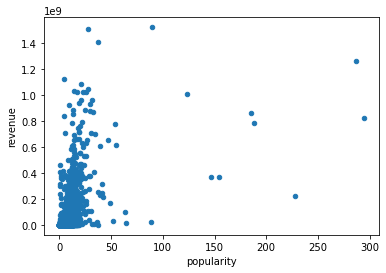

In [39]:
train_df.plot(kind= 'scatter', x = 'popularity', y=  'revenue')

In [ ]:
train_df.plot(kind='scatter', x = 'budget', y= 'revenue')

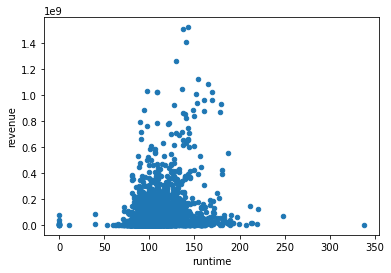

In [136]:
train_df.plot(kind = 'scatter', x= 'runtime', y= 'revenue')